1. ## Every section is in a cell
2. ### You can see all the results in folder **model_results**
3. ### You can watch all plots in folder **plots**
4. ### For any question you can open an issue or contact us through **mail / whatsapp**

In [ ]:
import tensorflow as tf
from mnist_stats import print_mnist_stats
from simple_model import simple_model_main
from datasets_generator import (
    apply_pca_reduction,
    create_dataset_with_filter,
    create_non_overlapping_filter_dataset,
)
from plot_utils import plot_comparison
from imbalance import prepare_over_and_under_datasets

In [2]:
# 1. Choose a Python environment and install it on your computer (PyCharm or Google Colab).
print(
    "We have used virtual environment and install all requirements listed in requirements.txt"
)

# 2. Install the following libraries: numpy, matplotlib, pandas, tensorflow, sklearn, and pytorch.
# Please see file requirements.txt for details.

We have used virtual environment and install all requirements listed in requirements.txt


In [3]:
# section 3 Write a program that loads the MNIST dataset.
def load_mnist():
    # Load the dataset
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    train = (x_train, y_train)
    test = (x_test, y_test)
    return train, test


# This is the original dataset we are going to use
train, test = load_mnist()

Number of images: 70000
Distribution of images across classes: {0: 6903, 1: 7877, 2: 6990, 3: 7141, 4: 6824, 5: 6313, 6: 6876, 7: 7293, 8: 6825, 9: 6958}
Average number of white pixels per class: {0: 592.2293205852528, 1: 698.1006728449918, 2: 615.1539341917024, 3: 620.5482425430612, 4: 642.081916764361, 5: 631.343893552986, 6: 626.2687609075043, 7: 652.6011243658303, 8: 610.3564835164835, 9: 640.6579476861167}
Standard deviation of white pixels per class: {0: 33.678417976376245, 1: 20.085412281604185, 2: 32.91386505918803, 3: 33.74005142172034, 4: 27.782422755142775, 5: 33.454476960285554, 6: 32.6452037307252, 7: 26.92546163267693, 8: 32.84410435016834, 9: 28.31171679312667}
Number of common non-white pixels per class: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


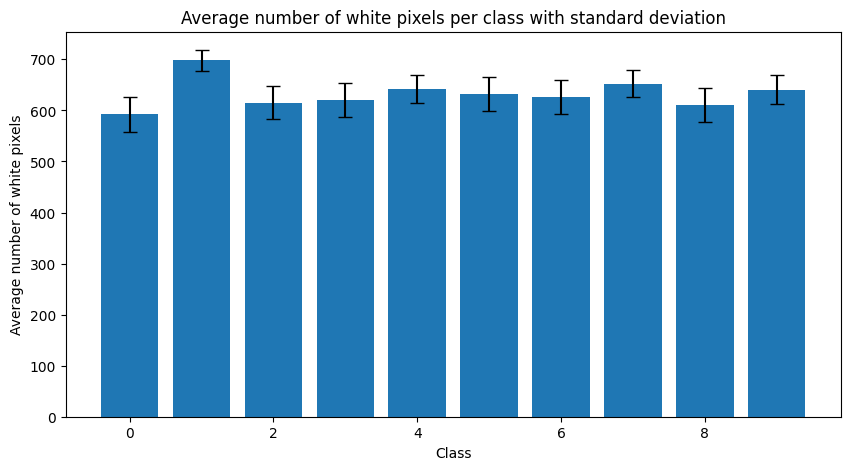

Plot saved to plots\avg_white_pixelsper_class_with_std


In [4]:
# Section 4 - please see mnist_stats.py
print_mnist_stats(train=train, test=test)

Epoch 1/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8652 - loss: 0.4752 - val_accuracy: 0.9570 - val_loss: 0.1535
Epoch 2/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9609 - loss: 0.1336 - val_accuracy: 0.9657 - val_loss: 0.1164
Epoch 3/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9736 - loss: 0.0885 - val_accuracy: 0.9674 - val_loss: 0.1096
Epoch 4/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9806 - loss: 0.0637 - val_accuracy: 0.9718 - val_loss: 0.0931
Epoch 5/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9849 - loss: 0.0498 - val_accuracy: 0.9726 - val_loss: 0.0914
Epoch 6/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9889 - loss: 0.0376 - val_accuracy: 0.9718 - val_loss: 0.0963
Epoch 7/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9905 - loss: 0.0318 - val_accuracy: 0.9758 - val_loss: 0.0855
Epoch 8/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9937 - loss: 0.0212 - 

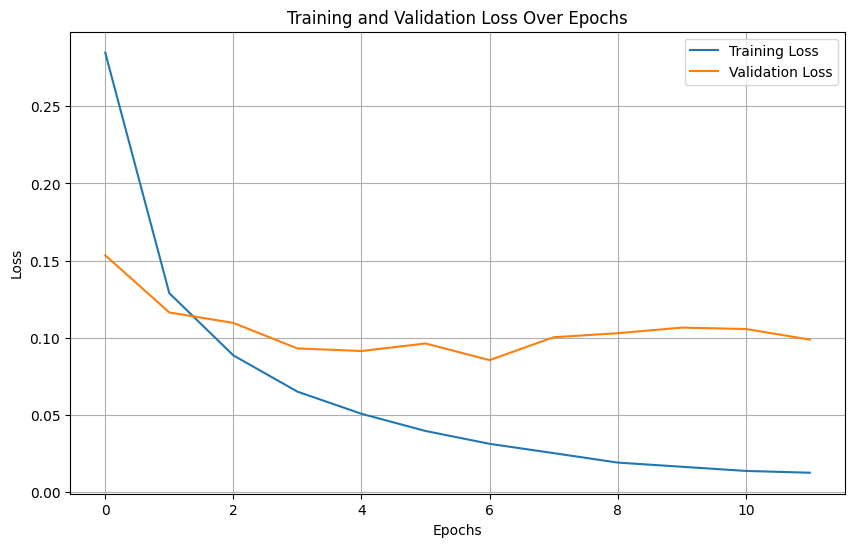

Plot saved to plots\original_loss
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9734 - loss: 0.1125
Test accuracy: 0.9768999814987183
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


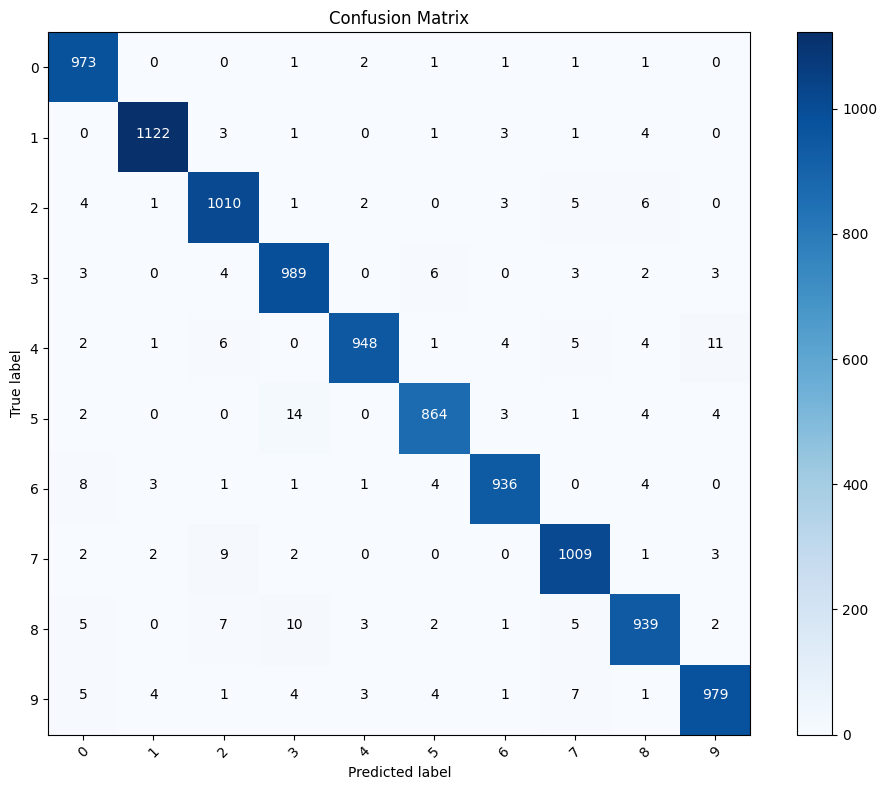

Plot saved to plots\original_confusion_matrix_simple_model


In [5]:
# Section 5,6,7 - please see simple_model.py
simple_model_main(train=train, test=test, file_prefix="original")

Original training data shape: (60000, 28, 28)
Filtered training data shape: (60000, 28, 28)
Original test data shape: (10000, 28, 28)
Filtered test data shape: (10000, 28, 28)


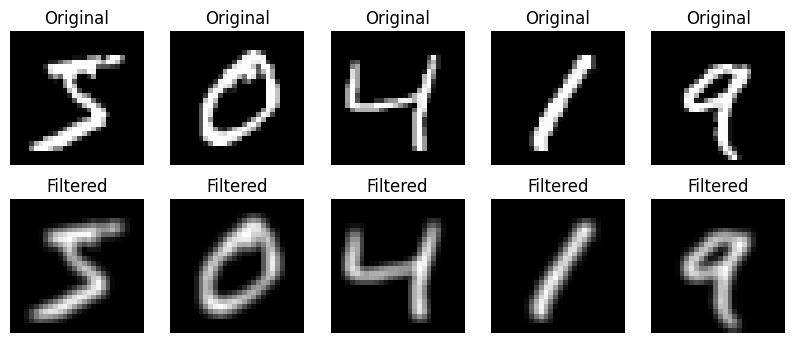

Plot saved to plots\comparison_pixel_surrounding_filter


In [6]:
# Section 8 - please see datasets_generator.py
train_filtered, test_filtered = create_dataset_with_filter(train=train, test=test)
plot_comparison(original=train[0], filtered=train_filtered[0], num_images=5)

Epoch 1/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8629 - loss: 0.4965 - val_accuracy: 0.9491 - val_loss: 0.1752
Epoch 2/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9514 - loss: 0.1653 - val_accuracy: 0.9638 - val_loss: 0.1282
Epoch 3/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9645 - loss: 0.1200 - val_accuracy: 0.9667 - val_loss: 0.1092
Epoch 4/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9706 - loss: 0.0948 - val_accuracy: 0.9697 - val_loss: 0.1056
Epoch 5/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9760 - loss: 0.0784 - val_accuracy: 0.9719 - val_loss: 0.0960
Epoch 6/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9788 - loss: 0.0687 - val_accuracy: 0.9754 - val_loss: 0.0857
Epoch 7/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9813 - loss: 0.0593 - val_accuracy: 0.9747 - val_loss: 0.0883
Epoch 8/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9837 - loss: 0.0501 - 

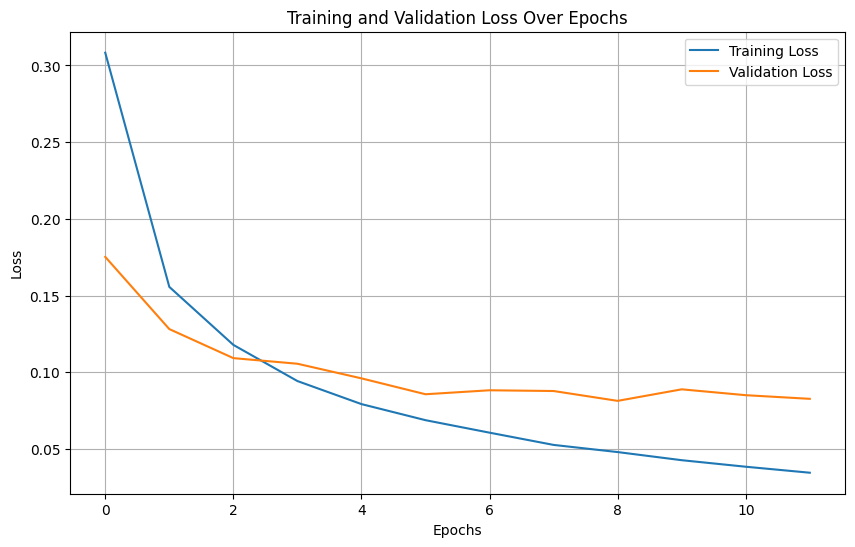

Plot saved to plots\filter_avg_loss
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9755 - loss: 0.0793
Test accuracy: 0.9782999753952026
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


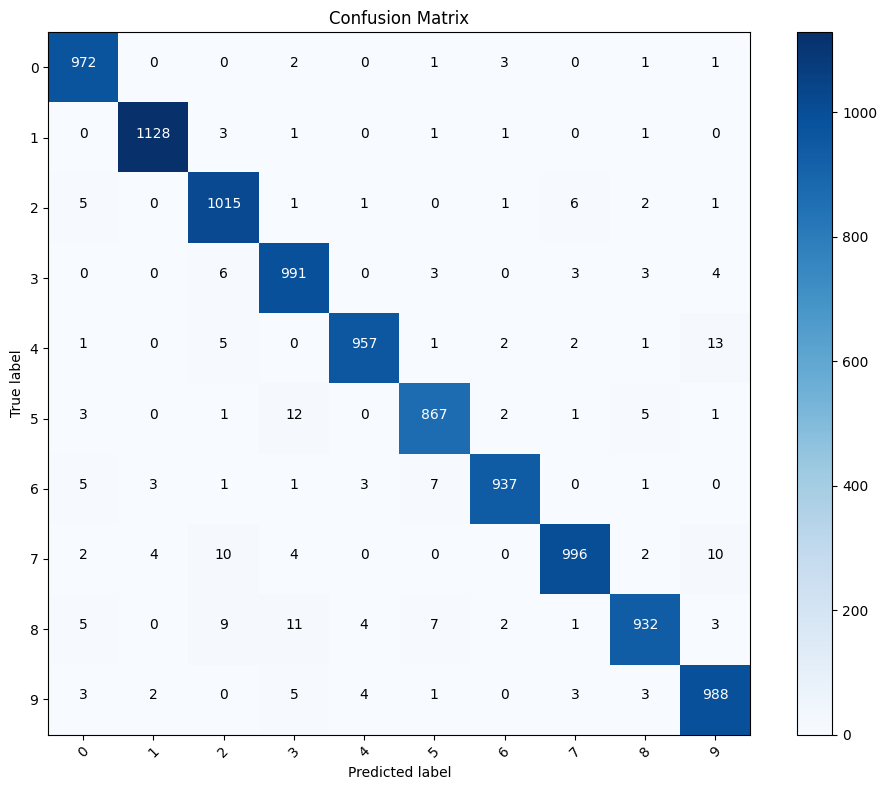

Plot saved to plots\filter_avg_confusion_matrix_simple_model


In [7]:
# re run 5-7 steps for the data after the filter
simple_model_main(train=train_filtered, test=test_filtered, file_prefix="filter_avg")

shape of data after pca is (10000, 50)
Epoch 1/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8098 - loss: 0.6756 - val_accuracy: 0.9495 - val_loss: 0.1786
Epoch 2/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9548 - loss: 0.1592 - val_accuracy: 0.9649 - val_loss: 0.1270
Epoch 3/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9712 - loss: 0.1060 - val_accuracy: 0.9711 - val_loss: 0.1036
Epoch 4/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9767 - loss: 0.0828 - val_accuracy: 0.9740 - val_loss: 0.0918
Epoch 5/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9820 - loss: 0.0645 - val_accuracy: 0.9753 - val_loss: 0.0854
Epoch 6/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9853 - loss: 0.0521 - val_accuracy: 0.9765 - val_loss: 0.0822
Epoch 7/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9875 - loss: 0.0454 - val_accuracy: 0.9774 - val_loss: 0.0806
Epoch 8/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/st

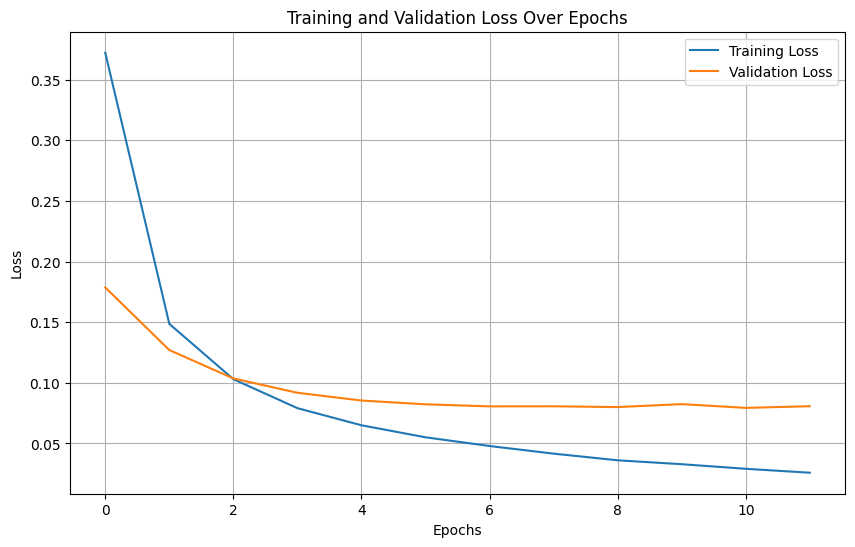

Plot saved to plots\pca_loss
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9724 - loss: 0.0883
Test accuracy: 0.9789000153541565
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


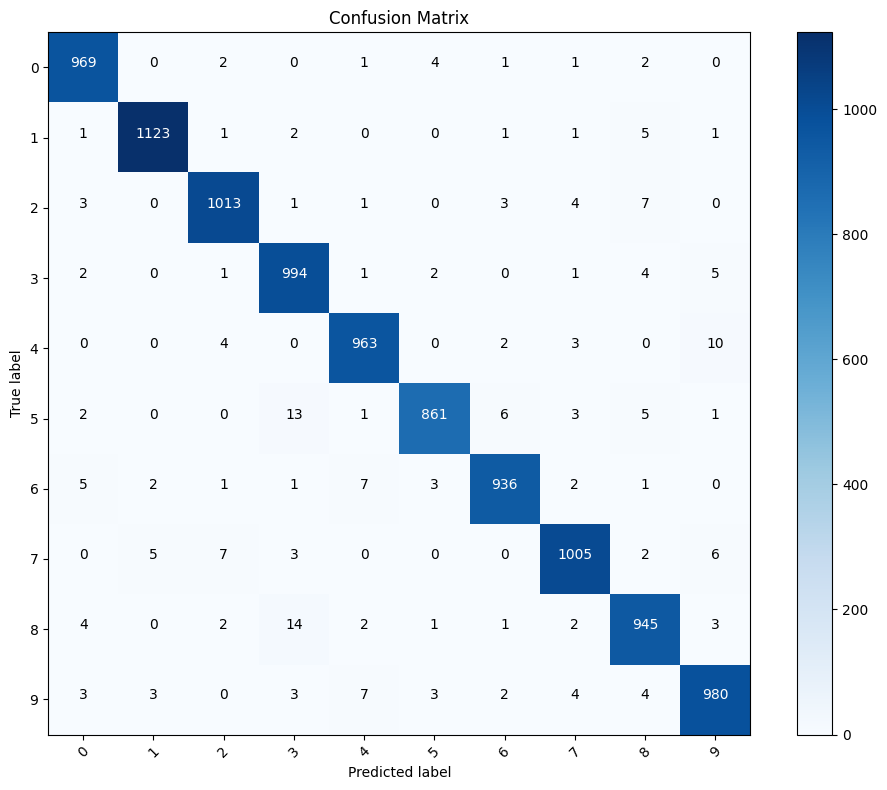

Plot saved to plots\pca_confusion_matrix_simple_model


In [8]:
# section 10 a
train_pca, test_pca = apply_pca_reduction(train, test)

# running model on pca data
simple_model_main(train=train_pca, test=test_pca, file_prefix="pca", input_shape=(50,))

## 12 . Compare the results of the classification applied to pca datasets and the original dataset.
PCA smooth the validation and improve performance, this is due to reduce dimensions.

Epoch 1/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7758 - loss: 0.8799 - val_accuracy: 0.9204 - val_loss: 0.2725
Epoch 2/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9226 - loss: 0.2722 - val_accuracy: 0.9410 - val_loss: 0.2083
Epoch 3/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9391 - loss: 0.2054 - val_accuracy: 0.9503 - val_loss: 0.1744
Epoch 4/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9497 - loss: 0.1709 - val_accuracy: 0.9513 - val_loss: 0.1610
Epoch 5/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9574 - loss: 0.1475 - val_accuracy: 0.9588 - val_loss: 0.1373
Epoch 6/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9616 - loss: 0.1308 - val_accuracy: 0.9629 - val_loss: 0.1253
Epoch 7/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9648 - loss: 0.1175 - val_accuracy: 0.9647 - val_loss: 0.1182
Epoch 8/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9701 - loss: 0.1044 - 

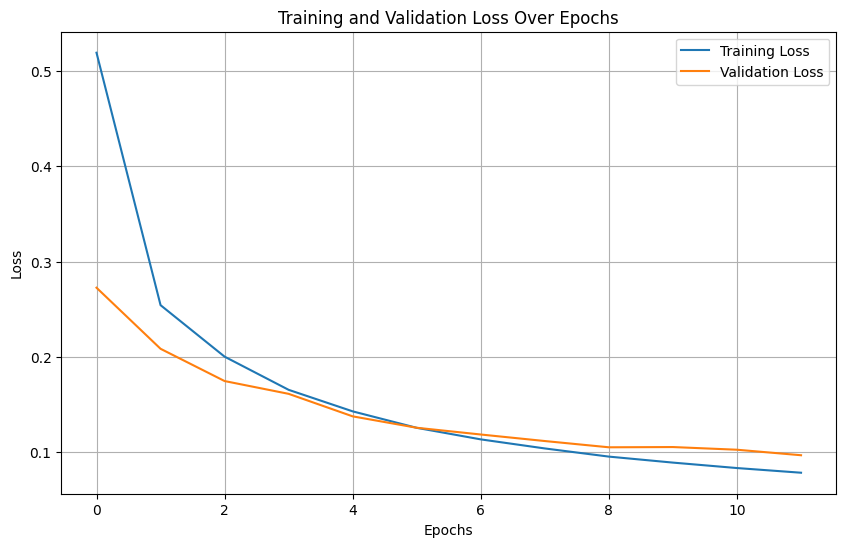

Plot saved to plots\non_overlapping_loss
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9679 - loss: 0.1057
Test accuracy: 0.9722999930381775
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


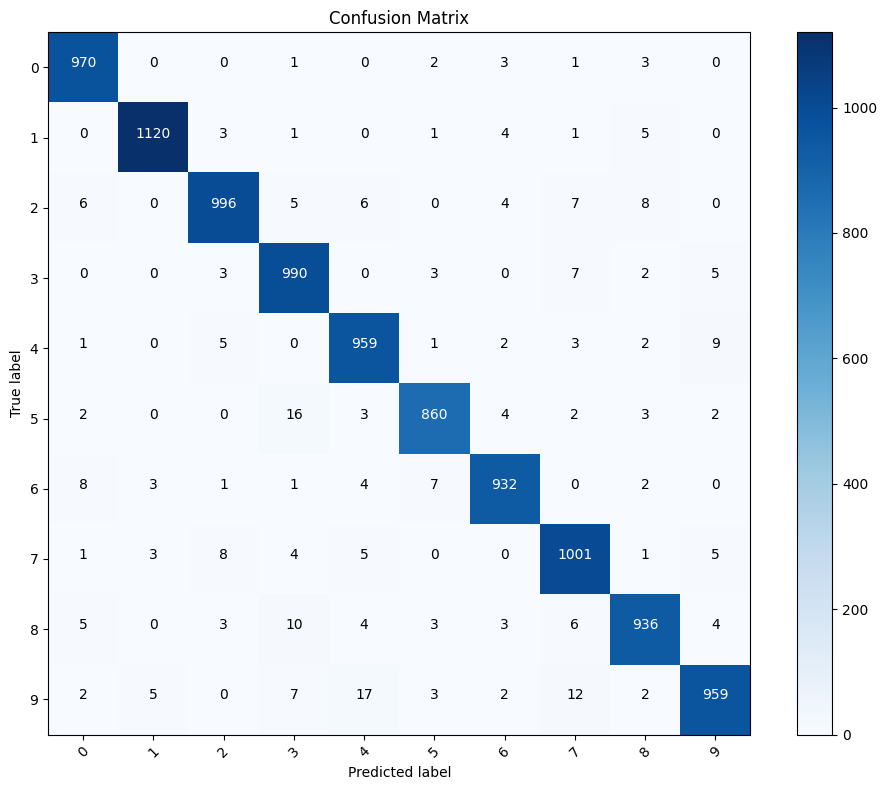

Plot saved to plots\non_overlapping_confusion_matrix_simple_model


In [9]:
# section 10 b
train_non_ovelapping, test_non_ovelapping = create_non_overlapping_filter_dataset(
    train, test
)

# section 11 - running model on 3x3 convolution non overlapping
simple_model_main(
    train=train_non_ovelapping,
    test=test_non_ovelapping,
    file_prefix="non_overlapping",
    input_shape=(10 * 10,),
)

## 12 . Compare the results of the classification applied to 3x3 convolution datasets and the original dataset.
the original dataset performs better because non-overlapping kernels can miss data and sum the image to a compressed image with
feature map that tries to grasp the importance of regions in the original image, perhaps a sliding kernel can improve our results.


Original class distribution: Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})
Undersample class distribution: Counter({3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421, 1: 3500, 7: 3500})
Oversample class distribution: Counter({3: 9631, 8: 9351, 1: 6742, 7: 6265, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 4: 5842, 5: 5421})


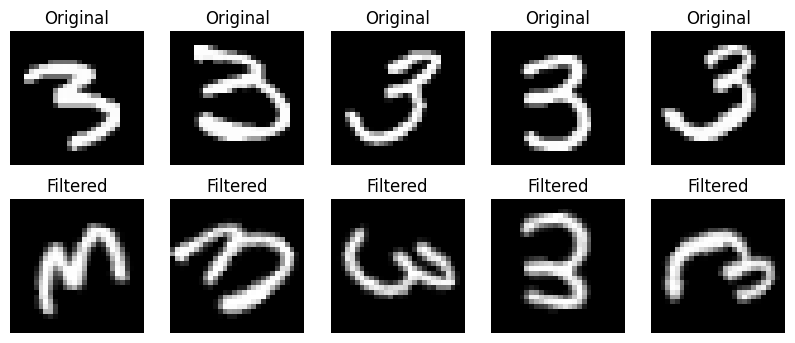

Plot saved to plots\comparison_augmented_vs_unaugmented


In [10]:
# Section 13-14 - please see imbalance.py
train_under, train_over_aug = prepare_over_and_under_datasets(x=train[0], y=train[1])

Epoch 1/12
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8593 - loss: 0.5030 - val_accuracy: 0.9503 - val_loss: 0.1729
Epoch 2/12
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9577 - loss: 0.1470 - val_accuracy: 0.9557 - val_loss: 0.1452
Epoch 3/12
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9727 - loss: 0.0952 - val_accuracy: 0.9669 - val_loss: 0.1157
Epoch 4/12
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9811 - loss: 0.0663 - val_accuracy: 0.9692 - val_loss: 0.1040
Epoch 5/12
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9855 - loss: 0.0501 - val_accuracy: 0.9708 - val_loss: 0.0983
Epoch 6/12
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9886 - loss: 0.0388 - val_accuracy: 0.9734 - val_loss: 0.0923
Epoch 7/12
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9904 - loss: 0.0314 - val_accuracy: 0.9728 - val_loss: 0.1004
Epoch 8/12
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9931 - loss: 0.0240 - 

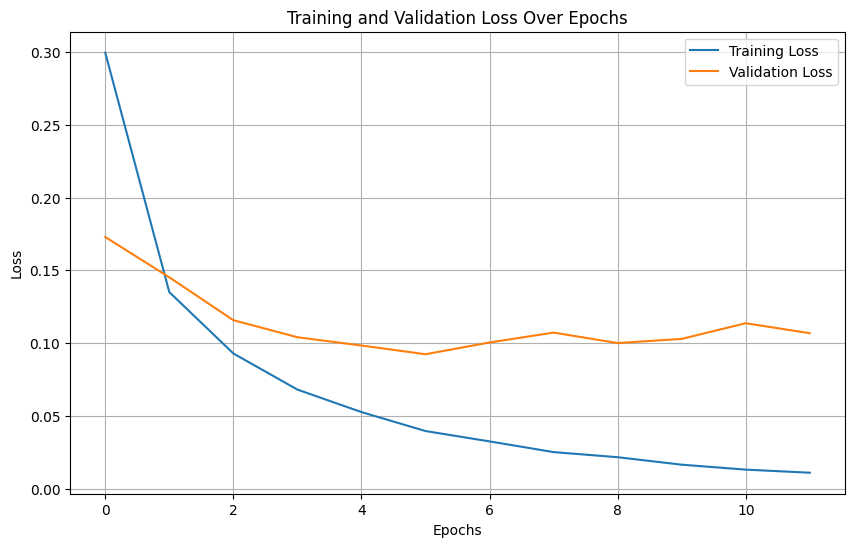

Plot saved to plots\filter_undersample_loss
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9742 - loss: 0.0988
Test accuracy: 0.9779000282287598
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


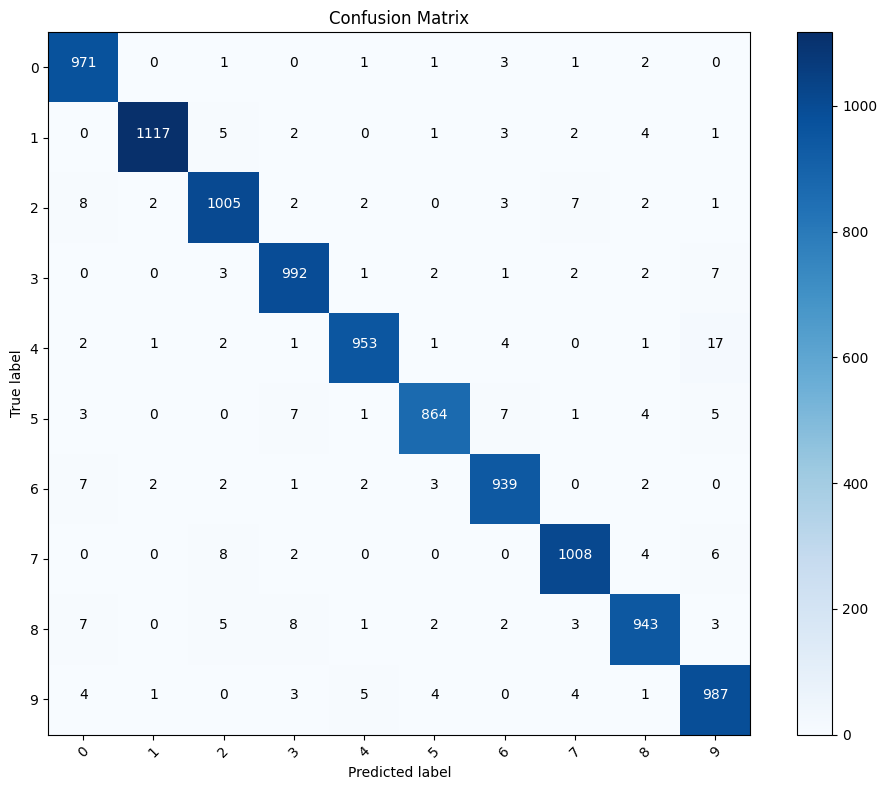

Plot saved to plots\filter_undersample_confusion_matrix_simple_model


In [11]:
# Section 14 data from 13 a - undersampling of two classes  - (Sections 11 -> 5,6,7) please see simple_model.py
simple_model_main(train=train_under, test=test, file_prefix="filter_undersample")

# Compare the results of the classification applied to each of the under sample dataset and the original dataset.
results are quite similar however the validation is inconsistent due to class imbalance distribution

Epoch 1/12
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8691 - loss: 0.4582 - val_accuracy: 0.7216 - val_loss: 1.3127
Epoch 2/12
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9635 - loss: 0.1263 - val_accuracy: 0.7419 - val_loss: 1.2566
Epoch 3/12
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9746 - loss: 0.0854 - val_accuracy: 0.7334 - val_loss: 1.5327
Epoch 4/12
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9813 - loss: 0.0624 - val_accuracy: 0.7541 - val_loss: 1.4210
Epoch 5/12
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9863 - loss: 0.0444 - val_accuracy: 0.7318 - val_loss: 1.8713
Epoch 6/12
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9890 - loss: 0.0379 - val_accuracy: 0.7327 - val_loss: 2.0316
Epoch 7/12
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9924 - loss: 0.0254 - val_accuracy: 0.7363 - val_loss: 2.0351
Epoch 8/12
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9942 - loss: 0.0205 - 

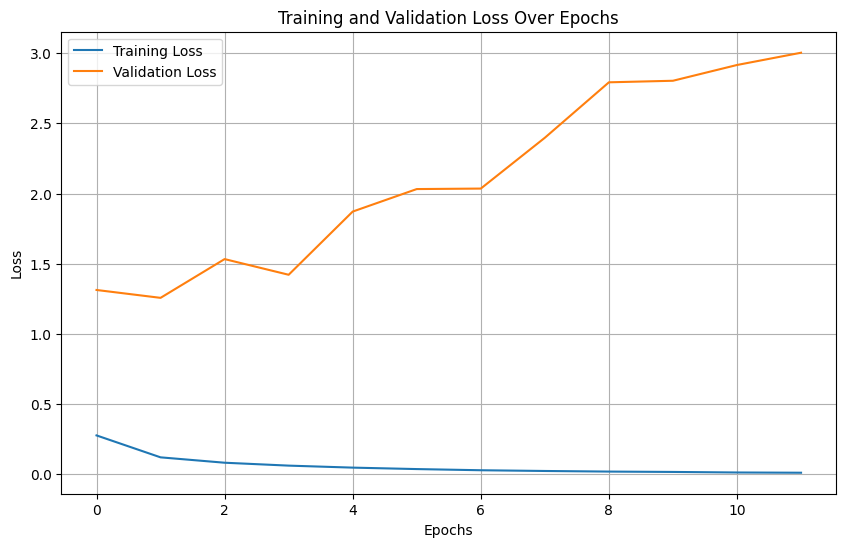

Plot saved to plots\filter_oversample_loss
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9728 - loss: 0.0947
Test accuracy: 0.9760000109672546
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


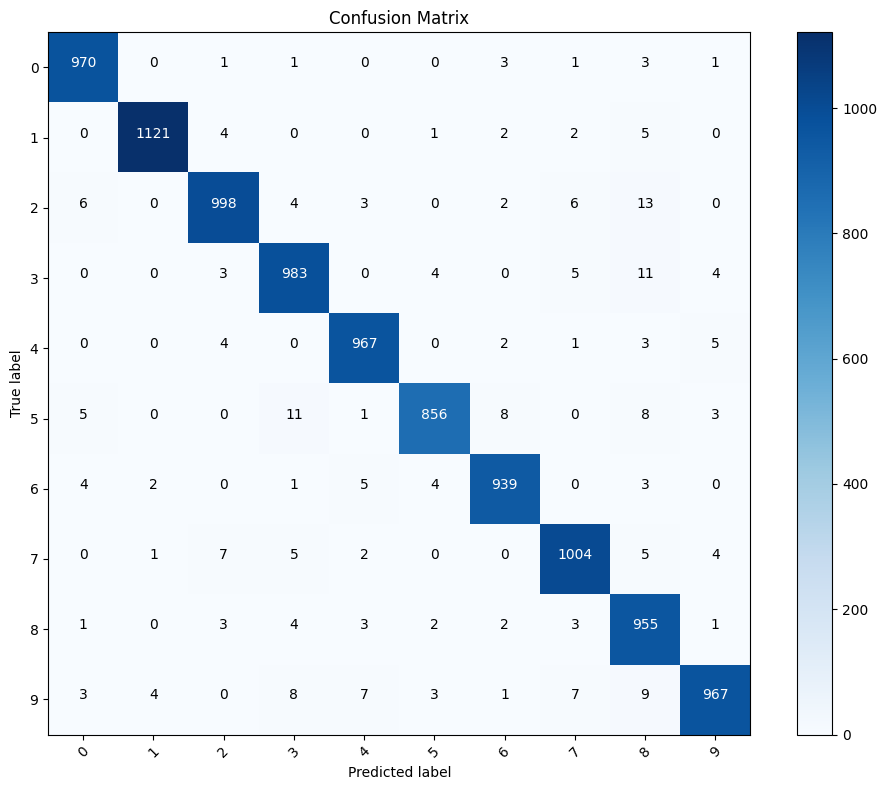

Plot saved to plots\filter_oversample_confusion_matrix_simple_model


In [12]:
# Section 14 data from 13 b - Oversampling of two classes by image augmentation  - (Sections 11 -> 5,6,7) please see simple_model.py
simple_model_main(train=train_over_aug, test=test, file_prefix="filter_oversample")

# Compare the results of the classification applied to each of the over sample dataset and the original dataset.
on the train dataset the oversample is overfitted due to many samples from same class, we can see on the validation is extermly different as if one of the oversample class can cause major divergence.